El siguiente notebook consiste en el desarrollo de las actividades pedidas en el curso de visión artificial de la Universidad Nacional de Colombia Sede Medellín, dictado por el profesor Jhon William Branch. El material des este curso fue recopilado    por los estudiantes Alberto Mario Ceballos Arroyo y Jairo Andres Rodriguez Rodriguez y se enuentra en el reositorio para el curso de Visión Artificial:
https://github.com/alceballosa/Vision-Artificial-2019-01

# Actividades de clase, semanas 4, 5 y 6 [Segunda parte]

Practica del día 25 de junio, consta de un módulo (módulo III) que corresponde a convoluciones.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

In [28]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time


def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

# Módulo III (cont.)

## 2.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. A continuación, se muestran dos funciones para creación e implementación de kernels.

In [29]:
#Función para hacer el kernel, su parámetro es el tamaño de éste
def make_kernel(size):
    #Matriz de unos del tamaño de entrada, datos de tipo flotante
    kernel = np.ones((size,size),dtype=np.float64)
    #r corresponde al entero más grande que sea menor o igual a size/2
    r = math.floor(size/2)
    return (r,kernel/(size**2))

#Función de aplicación de kernel sobre la imagen bajo los parámetros 
#imagen de entrada, máscara, valores en x,y,kernel,r
def apply_kernel(img, res, x,y,kernel,r):
    #Recorrer la imagen en el intervalo del radio del kernel
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            #Convolución sobre cada pixel de la imagen
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]

## Convolución con las funciones make_kernel y apply_kernel:
Utilizando las funciones anteriores, implemente una convolución a la imagen "res/gato.jpg" con un kernel de <b>tamaño 15x15. </b>

Explique: ¿Qué hace la función make_kernel? ¿Qué hace la función apply_kernel? ¿Por qué considera usted que los bordes se ven de color negro (adquieren valor 0)

### Debe obtener un resultado como este:

<img src = "res/convog.png">


## Convolución con Filter2D:

Utilizando la misma imagen ("res/gato.jpg"), con un kernel de <b> tamaño 15x15 </b>, realice el proceso de convolución, esta vez haga uso de la función cv2.filter2D (utilice el parámetro borderType = cv2.BORDER_REPLICATE).


### Debe obtener un resultado como este:

<img src = "res/conv.png">

# Mida la eficiencia de ambos procesos, utilizando la librería time de python.

¿Cuanto tarda cada caso de convolución implementado?

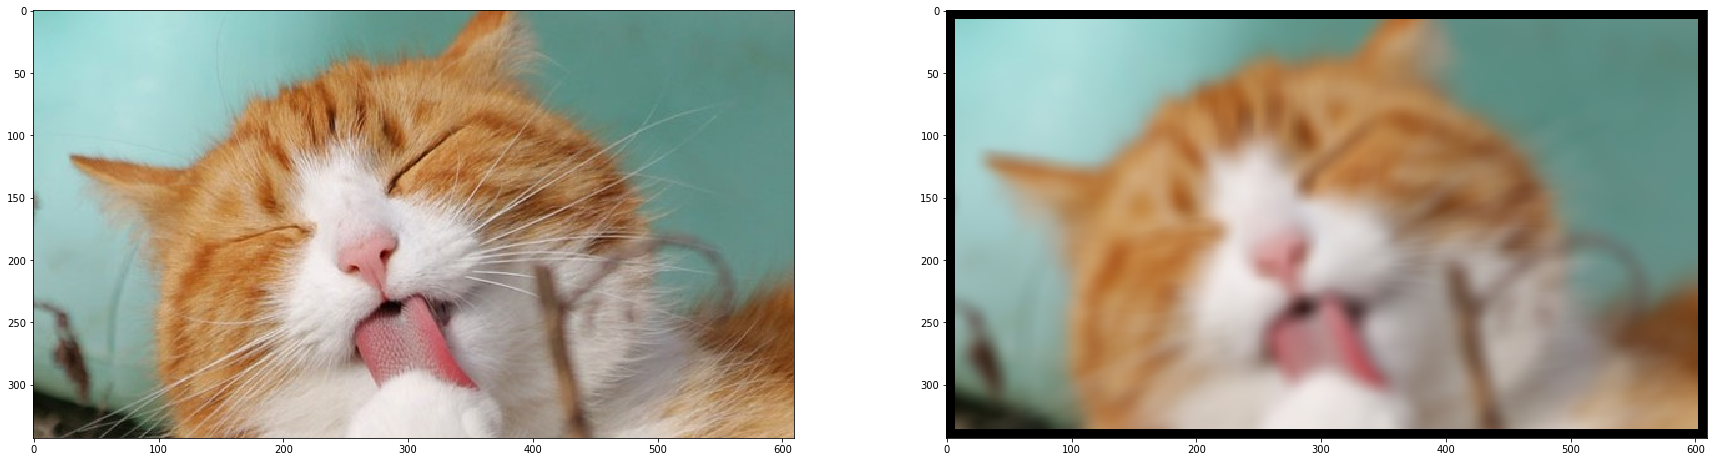

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None
    
#Función para hacer el kernel, su parámetro es el tamaño de éste
def make_kernel(size):
    #Matriz de unos del tamaño de entrada, datos de tipo flotante
    kernel = np.ones((size,size),dtype=np.float64)
    #r corresponde al entero más grande que sea menor o igual a size/2
    r = math.floor(size/2)
    return (r,kernel/(size**2))

#Función de aplicación de kernel sobre la imagen bajo los parámetros 
#imagen de entrada, máscara, valores en x,y,kernel,r
def apply_kernel(img, res, x,y,kernel,r):
    #Recorrer la imagen en el intervalo del radio del kernel
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            #Convolución sobre cada pixel de la imagen
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]

gato = img_read('res/gato.jpg', 'color')
(r, kernel) = make_kernel(15)
res = np.zeros(gato.shape, dtype=np.float64)

for i in range(r,gato.shape[0]-r):
    for j in range(r, gato.shape[1]-r):
        apply_kernel(gato, res, i, j, kernel, r)
        
res=res.astype(np.uint8)

fig, con = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
con[0].imshow(gato)
con[1].imshow(res)

In [39]:
t0 = time.clock()
##aquí van todos los procesos que usted desea cuantificar
print (time.process_time()-t0,"seconds")

-3022.4672657 seconds


C:\Users\Sofia Cardenas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


In [ ]:
#El proceso se demora unos 50 minutos. Las convoluciones realizan un borrón de la información de los bordes convirtiendolos 
#en negro y creando un bordeado; y ponen la imagen más borrosa.

## 3.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. En este ejercicio usted debe recrear distintos tipos de ruido que se presentan en imágenes.

El ruido es un factor que se encuentra en la mayoría de los problemas de visión artificial, utilizando las funciones de ruido Gaussiano, Pimienta y Poisson, obtenga:

<img src = "res/gatoxf.png">

A continuación se muestra la implementación de las funciones:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


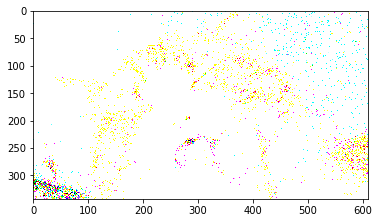

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

#Definir la función ruido gaussiano
def gaussian_noise(img, std):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1       
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

gato = img_read('res/gato.jpg', 'color')

a = gaussian_noise(gato,50)

plt.imshow(a)



In [ ]:
#Conclusión: Entre más aumento de ruido hay, más colorida se va poniendo la imagen
#pero no llega a mostrar la imagen original ya que el ruido se manifiesta a través de puntos colridos

C:\Users\JPHO\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\JPHO\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


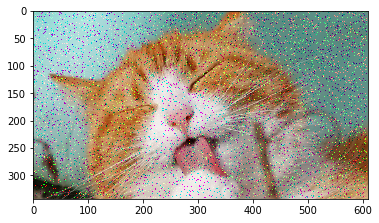

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

#Definir la función de ruido impulsivo
def sp_noise(img, s_vs_p, amount):
    
    #Obtener los valores de row, col y ch con base en la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    #Crear una copia de la imagen para volverla ruidosa
    noisy = img.copy()
    
    # Salt mode
    
    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * img.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]

    #La imagen evaluada en el vector coords se satura
    noisy[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    #La imagen en el vector coords se satura en color negro
    noisy[coords] = 0
    return noisy

gato = img_read('res/gato.jpg', 'color')

b = sp_noise(gato,0.5,0.05)

plt.imshow(b)

In [ ]:
#Conclusión: El ruido se manifiesta a través de puntos minúsculos parecidos a manchas de color morado, verde y amarillo

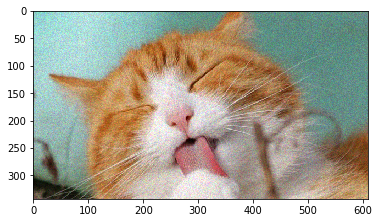

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

#Definir la función ruido de Poisson
def poisson_noise(img):
    
    #Se aplica el comando de numpy random.poisson a la imagen de entrada
    noisy = np.random.poisson(img) 
    #Los valores deben estar entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

c = poisson_noise(gato)

plt.imshow(c)

In [ ]:
#Conclusión: El ruido se manifiesta con manchas borrosas y deja la imagen empañada

## Sugerencia: Ajuste los parámetros std = 50, s_vs_p =  0.5, amount = 0.05

## No olvide variar los parámetros y observar qué ocurre al hacerlo.

## 4.

Lea la imagen 'res/rice.png'. Aplique 100 veces sucesivas un filtro de media de 3x3 a la imagen. ¿Qué resultado obtuvo?, ¿Qué comentarios puede hacer al respecto?

Ahora aplique 100 veces un filtro de media de 11x11 a la imagen. Compare y discuta los resultados obtenidos comparados con la imagen anterior.

¿Qué ocurre si el filtro 3x3 se aplica únicamente 2 veces? ¿Qué ocurre con 10? ¿Qué pasaría si se aplica un filtro de media infinitas veces a la imagen? 

## Ayuda:

Cuando aplique 100 veces el filtro de media 3x3 debe obtener lo siguiente:

<img src = "res/scenario.png">

###  Implementación del filtro:

Se muestra la imagen original, la imagen con el filtro de media de 3x3 aplicado y de 11x11, respectivamente:
Luego, se muestra lo que ocurre si el de 3x3 se aplica 2 veces o 10 veces. Y una cantidad muy elevada de veces, respectivamente:


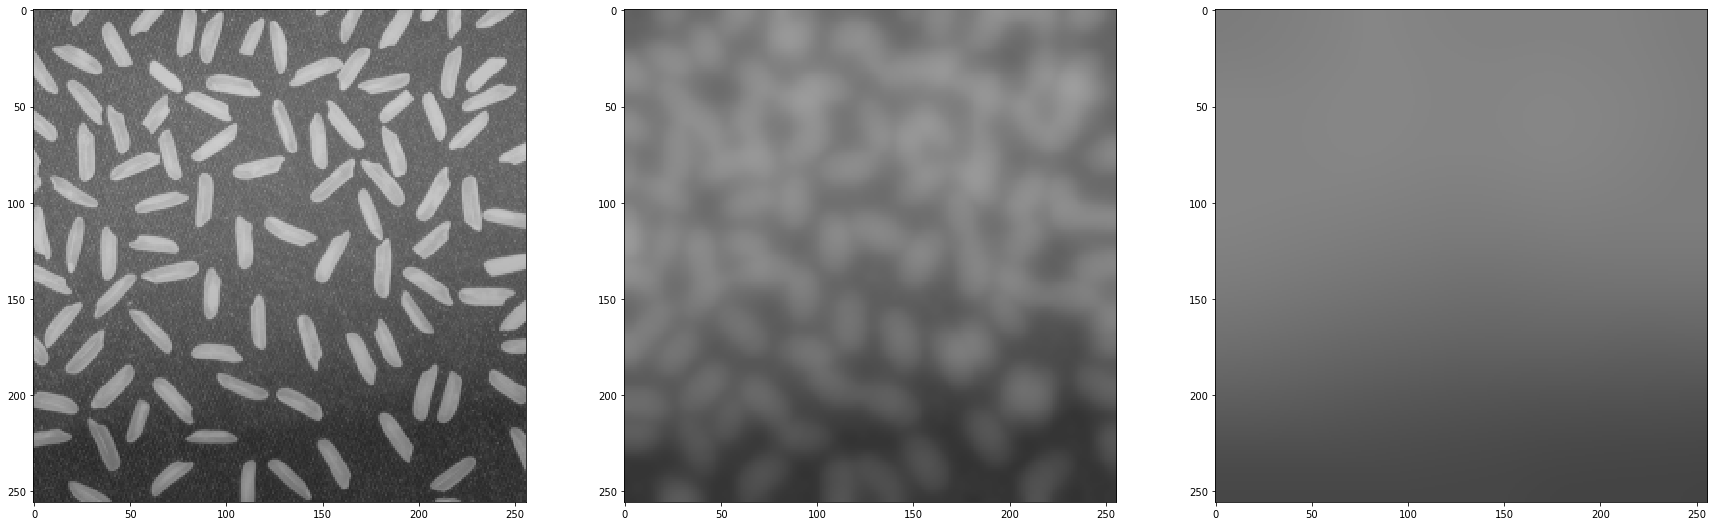

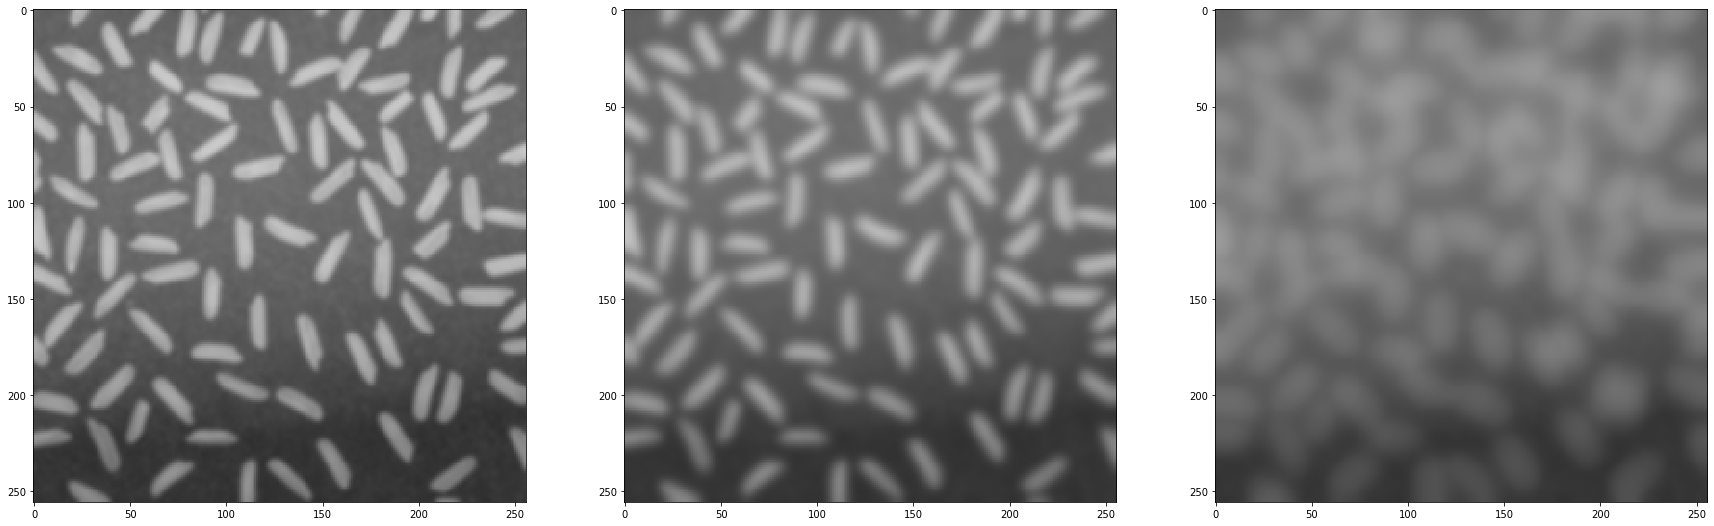

In [83]:
arroz = img_read('res/rice.png')

#Copias
res2 = arroz.copy()
res3 = arroz.copy()
res4 = arroz.copy()
res5 = arroz.copy()
res6 = arroz.copy()

####Implementación 100 veces filtro####
#tamaño del kernel
k_size = 3
#crear el kernel
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
#crear imagen que se va a modificar las n veces que se aplique el filtro
#ciclo que implementa el filtro de media
for i in range(0,100):
    res2 = cv2.filter2D(res2, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

    
k_size_2 = 11
kernel_2 = np.ones((k_size_2,k_size_2),np.float64)/(k_size_2**2)
for i in range(0,100):
    res3 = cv2.filter2D(res3, ddepth=-1, kernel= kernel_2, borderType=cv2.BORDER_REPLICATE)
 
print("Se muestra la imagen original, la imagen con el filtro de media de 3x3 aplicado y de 11x11, respectivamente:")
fig, noise = plt.subplots(nrows=1, ncols=3, figsize=(30,15))
noise[0].imshow(arroz)
noise[1].imshow(res2)
noise[2].imshow(res3)


# Para mostrar que ocurre si el de 3x3 se aplica 2 veces o 10 veces. Y una cantidad muy elevada de veces
for i in range(0,2):
    res4 = cv2.filter2D(res4, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)
    
for i in range(0,10):
    res5 = cv2.filter2D(res5, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)
    
for i in range(0,1000):
    res6 = cv2.filter2D(res6, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)
    
print("Luego, se muestra lo que ocurre si el de 3x3 se aplica 2 veces o 10 veces. Y una cantidad muy elevada de veces, respectivamente:")
fig, noi = plt.subplots(nrows=1, ncols=3, figsize=(30,15))
noi[0].imshow(res4)
noi[1].imshow(res5)
noi[2].imshow(res6)

In [ ]:
#Conclusión: Cada vez que se aplica un filtro, los objetos en la imagen ( el arroz) se va volviendo menos visible a medida
#del tiempo, hasta que llega un momento en el que se funde con el fondo oscuro.

## 5.

Utilice la función de ruido sal y pimienta (sp_noise), con s_vs_p = amount = 0.7.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", introduzcala en la función de ruido pimienta y posteriomente, aplique un filtro de mediana con kernel de tamaño 7x7.

<img src = "res/filter.png">

Recuerde utilizar la función cv2.medianBlur.

C:\Users\Sofia Cardenas\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Sofia Cardenas\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


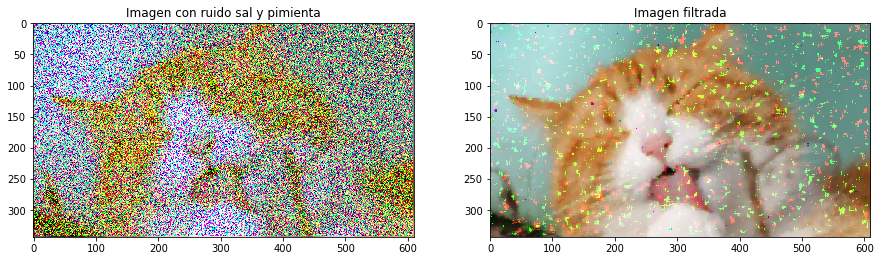

In [89]:
#np.random.uniform()
#Dar valores a los parámetros de entrada de la función ruido
s_vs_p = amount = 0.7

#Leer imagen de entrada
img = img_read('res/gato.jpg', 'color')
#Aplicar la función ruido y volver el tipo de dato uint8
res = sp_noise(img, s_vs_p, amount)
res = res.astype(np.uint8)

k_size = 7
res1= cv2.medianBlur(res, k_size)

#Generar un subplot 1x2 para mostrar imagen original e imagen con ruido sal y pimienta
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen con ruido sal y pimienta')
arreglo_plots[0].imshow(res, vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen filtrada')
arreglo_plots[1].imshow(res1, vmin=0, vmax=255)

In [ ]:
#Conclusión: Vemos cómo el filtro trata de contrarrestar la acción que hace el ruido de sal y pmienta, permitiendo que sea
#más visible.